<a href="https://colab.research.google.com/github/Akshita0501/CODSOFT/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file_path = '/content/drive/My Drive/creditcard_fraud.zip'

# Destination directory for extraction
extraction_dir = '/content/'

# Extract the dataset from the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the files in the extraction directory to verify the file names
extracted_files = os.listdir(extraction_dir)
print("Extracted files:", extracted_files)

selected_csv_file = 'fraudTrain.csv'
csv_file_path = os.path.join(extraction_dir, selected_csv_file)

if os.path.isfile(csv_file_path):
    data = pd.read_csv(csv_file_path)
    print("Data loaded successfully.")
else:
    print(f"File not found: {selected_csv_file}")


Extracted files: ['.config', '.ipynb_checkpoints', 'fraudTrain.csv', 'fraudTest.csv', 'drive', 'sample_data']


<ipython-input-60-a752314ebbbe>:18: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_path)


Data loaded successfully.


In [ ]:
#Data PreProcessing

y = data['is_fraud']
numeric_columns = data.select_dtypes(include=['number'])
X = numeric_columns.drop('is_fraud', axis=1)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np

# Check for NaN or missing values in the target variable (numpy array)
missing_values = np.isnan(y_train).sum()
print("NaN values in y_train:", missing_values)



NaN values in y_train: 0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Feature scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




Model building and evaluation

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))
print("Classification Report:\n", classification_report(y_test, logistic_pred))

Logistic Regression Results:
Confusion Matrix:
 [[258473    153]
 [  1484      0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    258626
         1.0       0.00      0.00      0.00      1484

    accuracy                           0.99    260110
   macro avg       0.50      0.50      0.50    260110
weighted avg       0.99      0.99      0.99    260110



In [ ]:


# Decision Trees
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("Decision Trees Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_pred))
print("Classification Report:\n", classification_report(y_test, tree_pred))


Decision Trees Results:
Confusion Matrix:
 [[257699    927]
 [   767    717]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    258626
         1.0       0.44      0.48      0.46      1484

    accuracy                           0.99    260110
   macro avg       0.72      0.74      0.73    260110
weighted avg       0.99      0.99      0.99    260110



In [ ]:
# Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

print("Random Forests Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, forest_pred))
print("Classification Report:\n", classification_report(y_test, forest_pred))

Random Forests Results:
Confusion Matrix:
 [[258464    162]
 [   766    718]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    258626
         1.0       0.82      0.48      0.61      1484

    accuracy                           1.00    260110
   macro avg       0.91      0.74      0.80    260110
weighted avg       1.00      1.00      1.00    260110



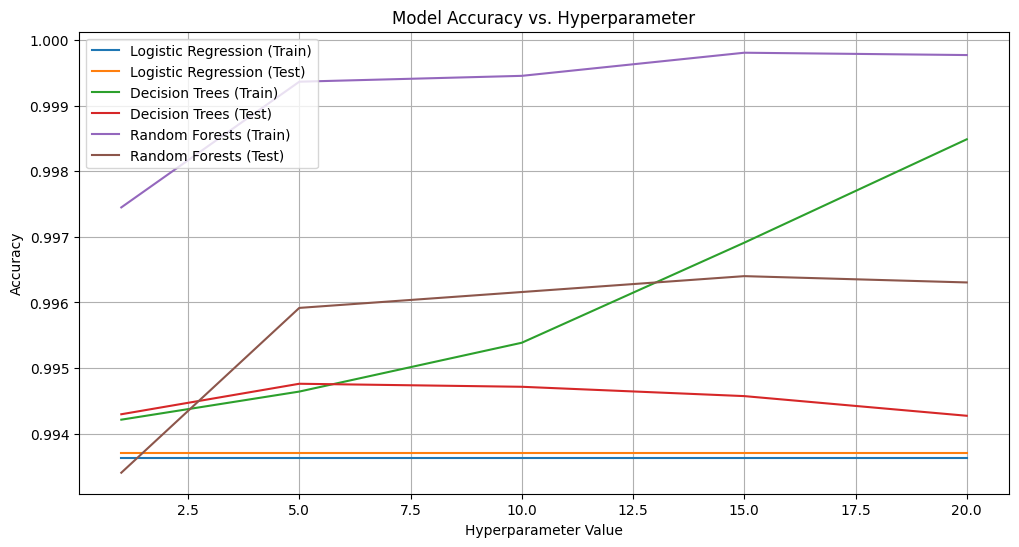

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a range of hyperparameter values (e.g., regularization strength for Logistic Regression)
hyperparameters = [0.001, 0.01, 0.1, 1, 10]

# Initialize lists to store training and testing accuracies for each model
logistic_train_accuracies = []
logistic_test_accuracies = []
tree_train_accuracies = []
tree_test_accuracies = []
forest_train_accuracies = []
forest_test_accuracies = []
# Create a range of hyperparameter values for max_depth
hyperparameters = [1, 5, 10, 15, 20]
for param in hyperparameters:

    # Logistic Regression
    logistic_model = LogisticRegression(C=param)
    logistic_model.fit(X_train, y_train)
    logistic_train_pred = logistic_model.predict(X_train)
    logistic_test_pred = logistic_model.predict(X_test)
    logistic_train_accuracies.append(accuracy_score(y_train, logistic_train_pred))
    logistic_test_accuracies.append(accuracy_score(y_test, logistic_test_pred))

    # Decision Trees
    tree_model = DecisionTreeClassifier(max_depth=param)
    tree_model.fit(X_train, y_train)
    tree_train_pred = tree_model.predict(X_train)
    tree_test_pred = tree_model.predict(X_test)
    tree_train_accuracies.append(accuracy_score(y_train, tree_train_pred))
    tree_test_accuracies.append(accuracy_score(y_test, tree_test_pred))

    # Random Forests
    forest_model = RandomForestClassifier(n_estimators=param)
    forest_model.fit(X_train, y_train)
    forest_train_pred = forest_model.predict(X_train)
    forest_test_pred = forest_model.predict(X_test)
    forest_train_accuracies.append(accuracy_score(y_train, forest_train_pred))
    forest_test_accuracies.append(accuracy_score(y_test, forest_test_pred))

# Create accuracy graphs for each model
plt.figure(figsize=(12, 6))
plt.title('Model Accuracy vs. Hyperparameter')
plt.xlabel('Hyperparameter Value')
plt.ylabel('Accuracy')
plt.plot(hyperparameters, logistic_train_accuracies, label='Logistic Regression (Train)')
plt.plot(hyperparameters, logistic_test_accuracies, label='Logistic Regression (Test)')
plt.plot(hyperparameters, tree_train_accuracies, label='Decision Trees (Train)')
plt.plot(hyperparameters, tree_test_accuracies, label='Decision Trees (Test)')
plt.plot(hyperparameters, forest_train_accuracies, label='Random Forests (Train)')
plt.plot(hyperparameters, forest_test_accuracies, label='Random Forests (Test)')
plt.legend()
plt.grid(True)
plt.show()


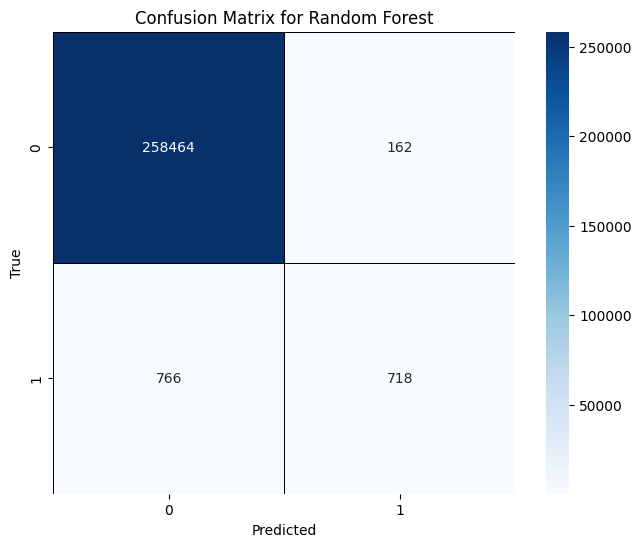

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, forest_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", square=True)

# Add labels and titles
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')

# Display the plot
plt.show()


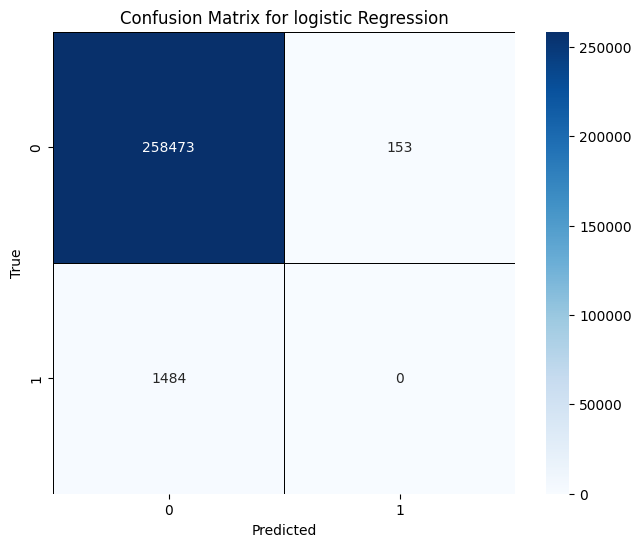

In [ ]:

confusion_mat = confusion_matrix(y_test, logistic_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", square=True)

# Add labels and titles
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for logistic Regression')

# Display the plot
plt.show()

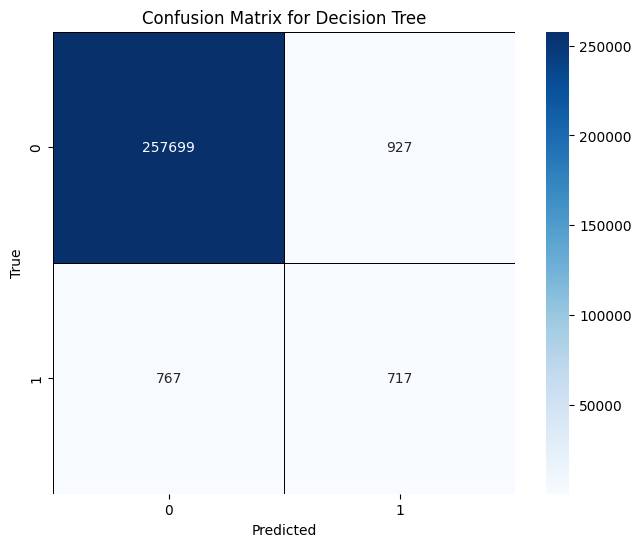

In [ ]:
confusion_mat = confusion_matrix(y_test, tree_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", square=True)

# Add labels and titles
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')

# Display the plot
plt.show()